In [12]:
# import libraries
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
import pickle
import sklearn

In [13]:
# read file
df_original=pd.read_csv("test_data.csv")

df =df_original
df.head()

,registered,cnt
0,153,231
1,120,162
2,17,21
3,111,120
4,188,295


In [14]:
# separate labels and features
x_test=df.iloc[:,:-1].values
y_test=df.iloc[:,1].values

In [15]:
# reading the pickle file

fileObject = open('train_data.pkl','rb')  
poly_reg = pickle.load(fileObject)
lin_reg2 = pickle.load(fileObject)  



Accuracy of test data = 95.12827516393003


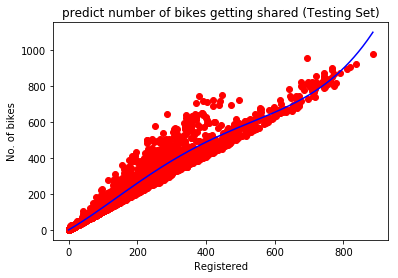

In [16]:
class PolynomialRegression:
    
    def get_predictions(self,x_test):
        
        # getting the prediction values on train model
        y_pred=lin_reg2.predict(poly_reg.fit_transform(x_test))
        
        return y_pred
    
    def get_accuracy(self,y_pred,y_test):        

        Accuracy = sklearn.metrics.r2_score(y_test,y_pred)*100
        return Accuracy

    
    def visualize_cvset(self):
        # visualizing the testing set result
        x_grid=np.arange(min(x_test),max(x_test),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_test,y_test,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict number of bikes getting shared (Testing Set)')
        plt.xlabel('Registered')
        plt.ylabel('No. of bikes')
        plt.show()
    

    
def main():
    # creates class object 
    obj = PolynomialRegression()
    y_pred=obj.get_predictions(x_test)
    acc_test=obj.get_accuracy(y_pred,y_test)
    print("Accuracy of test data =",acc_test)
    
    obj.visualize_cvset()
if __name__ == '__main__':
    main()
    
